In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings #경고 메세지 무시하기
warnings.filterwarnings(action='ignore')

In [3]:
plt.rcParams['font.family'] = 'AppleGothic'

In [4]:
sw = pd.read_csv('/Users/kang-yumin/Desktop/Ch 01_파이썬 실습 Starwars/Starwars.csv')

In [8]:
sw.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human


In [9]:
# 칼럼 설명
#범주형 변수, 연속형 범주 구분

In [10]:
sw.info() #컬럼 기본 정보 확인하기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        87 non-null     object 
 1   height      81 non-null     float64
 2   mass        59 non-null     float64
 3   hair_color  82 non-null     object 
 4   skin_color  87 non-null     object 
 5   eye_color   87 non-null     object 
 6   birth_year  43 non-null     float64
 7   sex         83 non-null     object 
 8   gender      83 non-null     object 
 9   homeworld   77 non-null     object 
 10  species     83 non-null     object 
dtypes: float64(3), object(8)
memory usage: 7.6+ KB


In [11]:
sw.describe() #연속형(수치) 데이터의 통계치 확인하기

,height,mass,birth_year
count,81.000000,59.000000,43.000000
mean,174.358025,97.311864,87.565116
std,34.770429,169.457163,154.691439
min,66.000000,15.000000,8.000000
25%,167.000000,55.600000,35.000000
50%,180.000000,79.000000,52.000000
75%,191.000000,84.500000,72.000000
max,264.000000,1358.000000,896.000000


In [17]:
sw.describe(include =np.object) #범주형 데이터의 통계치 확인하기

,name,hair_color,skin_color,eye_color,sex,gender,homeworld,species
count,87,82,87,87,83,83,77,83
unique,87,12,31,15,4,2,48,37
top,Luke Skywalker,none,fair,brown,male,masculine,Naboo,Human
freq,1,37,17,21,60,66,11,35


In [18]:
print('Hair color:', sw['hair_color'].unique())
#범주형 데이터 컬럼 안에는 어떤 내용이 들어있을까?

Hair color: ['blond' nan 'none' 'brown' 'brown, grey' 'black' 'auburn, white'
 'auburn, grey' 'white' 'grey' 'auburn' 'blonde' 'unknown']


In [21]:
print('skin:', sw['skin_color'].unique())
print('Eye colour: ', sw['eye_color'].unique())
print('Sex: ', sw['sex'].unique())
print('Gender: ', sw['gender'].unique())
print('Homeworld: ', sw['homeworld'].unique())
print('Species: ', sw['species'].unique())

#범주가 적으면 범주 별 그래프를 그리기 쉽다
#이 데이터에서는 sex, gender!

skin: ['fair' 'gold' 'white, blue' 'white' 'light' 'white, red' 'unknown'
 'green' 'green-tan, brown' 'pale' 'metal' 'dark' 'brown mottle' 'brown'
 'grey' 'mottled green' 'orange' 'blue, grey' 'grey, red' 'red' 'blue'
 'grey, green, yellow' 'yellow' 'tan' 'fair, green, yellow' 'grey, blue'
 'silver, red' 'green, grey' 'red, blue, white' 'brown, white' 'none']
Eye colour:  ['blue' 'yellow' 'red' 'brown' 'blue-gray' 'black' 'orange' 'hazel' 'pink'
 'unknown' 'red, blue' 'gold' 'green, yellow' 'white' 'dark']
Sex:  ['male' 'none' 'female' 'hermaphroditic' nan]
Gender:  ['masculine' 'feminine' nan]
Homeworld:  ['Tatooine' 'Naboo' 'Alderaan' 'Stewjon' 'Eriadu' 'Kashyyyk' 'Corellia'
 'Rodia' 'Nal Hutta' 'Bestine IV' nan 'Kamino' 'Trandosha' 'Socorro'
 'Bespin' 'Mon Cala' 'Chandrila' 'Endor' 'Sullust' 'Cato Neimoidia'
 'Coruscant' 'Toydaria' 'Malastare' 'Dathomir' 'Ryloth' 'Vulpter'
 'Troiken' 'Tund' 'Haruun Kal' 'Cerea' 'Glee Anselm' 'Iridonia' 'Iktotch'
 'Quermia' 'Dorin' 'Champala' 'Geonos

In [22]:
#데이터 내용 간단히 정리해서 출력하기
print('총데이터 개수:', sw.shape[0]*sw.shape[1])

총데이터 개수: 957


In [26]:
print("총 결측치 수: {} = 전체 데이터의 {:.2f}% ".format(sw.isnull().sum().sum(), (sw.isnull().sum().sum()*100)/(sw.shape[0]*sw.shape[1])))

총 결측치 수: 105 = 전체 데이터의 10.97% 


In [27]:
print('등장인물 수:', sw['name'].nunique())
print('종족 수: ',sw['species'].nunique())

등장인물 수: 87
종족 수:  37


2.데이터를 보고 질문 만들기
스타워즈 캐릭터의 성별 비율은?
성별에 따른 캐릭터 신장의 분포는?
가장 무거운 캐릭터와 가장 가벼운 캐릭터는?
스타워즈 캐릭터의 키와 몸무게는 상관관계를 가질까?
3.데이터 정비하기


In [28]:
#3-1.결측치 처리하기

In [33]:
#NULL이 존재하는 컬럼 확인하기
sw.isnull().any(axis=0)

name          False
height         True
mass           True
hair_color     True
skin_color    False
eye_color     False
birth_year     True
sex            True
gender         True
homeworld      True
species        True
dtype: bool

In [39]:
sw.isnull().sum() #컬럼별로 NULL 개수 확인하기

name           0
height         0
mass           0
hair_color     5
skin_color     0
eye_color      0
birth_year    44
sex            4
gender         4
homeworld     10
species        4
dtype: int64

In [38]:
#어떤 컬럼의 결측치를 처리할것인가?
#hair color, sex, gender, homeworld, species의 경우 개인 특성이므로 다른 값을 넣어주는 것이 의미가 없다
#height, mass에서는 결측치를 0으로 처리해보자
sw['height'].fillna(0, inplace=True)
sw['mass'].fillna(0, inplace=True)
sw.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human


In [42]:
print(sw[sw['sex'] == 'none'])
print(sw[sw['sex'].isnull()])

      name  height   mass hair_color   skin_color  eye_color  birth_year  \
1    C-3PO   167.0   75.0        NaN         gold     yellow       112.0   
2    R2-D2    96.0   32.0        NaN  white, blue        red        33.0   
7    R5-D4    97.0   32.0        NaN   white, red        red         NaN   
21   IG-88   200.0  140.0       none        metal        red        15.0   
72  R4-P17    96.0    0.0       none  silver, red  red, blue         NaN   
84     BB8     0.0    0.0       none         none      black         NaN   

     sex     gender homeworld species  
1   none  masculine  Tatooine   Droid  
2   none  masculine     Naboo   Droid  
7   none  masculine  Tatooine   Droid  
21  none  masculine       NaN   Droid  
72  none   feminine       NaN   Droid  
84  none  masculine       NaN   Droid  
              name  height  mass hair_color skin_color eye_color  birth_year  \
36        Ric Oli?   183.0   0.0      brown       fair      blue         NaN   
39   Quarsh Panaka   183.0 

In [43]:
sw['sex'][(sw['sex'] == 'none')] = 'robot'
print('Sex: ', sw['sex'].unique())

Sex:  ['male' 'robot' 'female' 'hermaphroditic' nan]


# 4.EDA & Visualization

In [44]:
#4-1. 스타워즈 캐릭터의 성별 비율

In [47]:
#스타워즈 캐릭터의 성비(sex, gender)는?
sw['gender'].value_counts()
sw['sex'].value_counts()

male              60
female            16
robot              6
hermaphroditic     1
Name: sex, dtype: int64

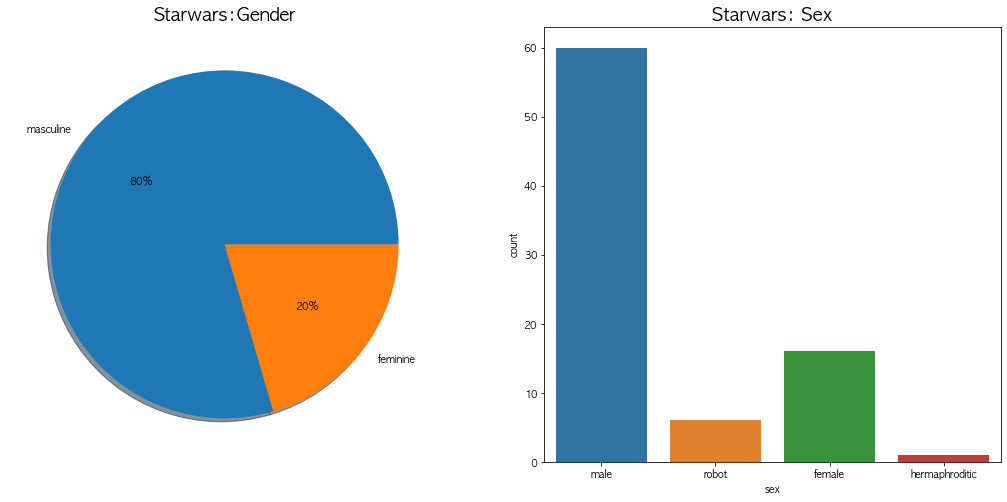

In [61]:
#그래프
f, ax = plt.subplots(1,2,figsize=(18,8))
sw['gender'].value_counts().plot.pie(ax=ax[0], autopct='%1.0f%%', shadow=True)
ax[0].set_title('Starwars:Gender', size =18)
ax[0].set_ylabel('')
sns.countplot(x='sex', data=sw, ax=ax[1])
ax[1].set_title('Starwars: Sex', size=18)
plt.show()

4-2. 스타워즈 캐릭터의 성별에 따른 신장 분포

In [62]:
sw['height'].describe()

count     87.000000
mean     162.333333
std       55.671726
min        0.000000
25%      164.000000
50%      178.000000
75%      190.500000
max      264.000000
Name: height, dtype: float64

In [63]:
#skewness and kurtosis 구하기
#Skewness(왜도): 데이터가 정규분포에서 한 쪽으로 치우쳐있는가?
#                -3 < skewness < 3 사이의 값이면 기준에 부합한다
#Kurtosis(첨도): 얼마나 뾰족한가(데이터가 얼마나 평균 근처에 몰려있는가)?
#               : 정규분포의 kurtosis = 0
print("Skewness: %f" % sw['height'].skew())
print("Kurtosis: %f" % sw['height'].kurt())

Skewness: -1.760878
Kurtosis: 2.927697


In [64]:
#자웅동체(hermaphroditic) 캐릭터(Jabba Desilijic Tiure)는 하나 뿐이므로 확률분포를 구하는것이 불가능!
sw[sw['sex'] == 'hermaphroditic'].head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
15,Jabba Desilijic Tiure,175.0,1358.0,NaN,"green-tan, brown",orange,600.0,hermaphroditic,masculine,Nal Hutta,Hutt


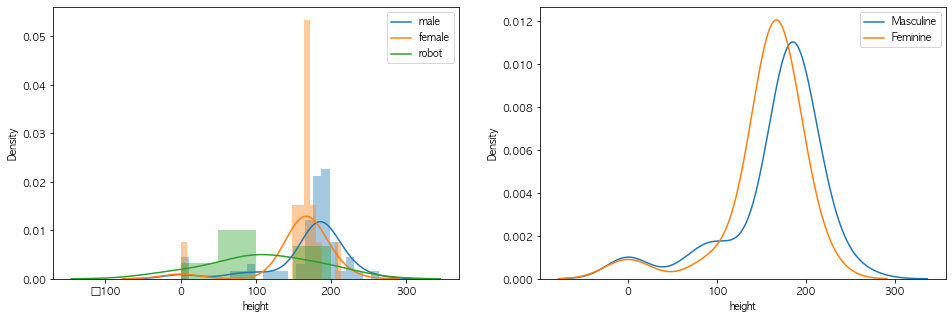

In [70]:
fig, ax = plt.subplots(1,2,figsize=(16,5))
#히스토그램
sns.distplot(sw[sw['sex']=='male']['height'],ax=ax[0]) #ax=0 left
sns.distplot(sw[sw['sex']=='female']['height'], ax=ax[0])
sns.distplot(sw[sw['sex']=='robot']['height'], ax=ax[0])
ax[0].legend(['male','female','robot'])
#분포
sns.kdeplot(sw[sw['gender'] == 'masculine']['height'], ax=ax[1]) #ax=1 right
sns.kdeplot(sw[sw['gender'] == 'feminine']['height'], ax=ax[1])
ax[1].legend(['Masculine','Feminine'])

plt.show()

4-3. 가장 가벼운 캐릭터와 가장 무거운 캐릭터

In [71]:
notz = sw[sw['mass']!=0] #몸무게가 가장 가벼운 캐릭터
min(notz['mass'])#몸무게가 0인 것은 제외하자!

15.0

In [75]:
print("{}의 몸무게가 {} (으)로 가장 가볍다 ".format(notz[notz['mass'] == min(notz['mass'])]['name'].values, min(notz['mass'])))
print("{}의 몸무게가 {} (으)로 가장 가볍다 ".format(notz[notz['mass'] == max(notz['mass'])]['name'].values, max(notz['mass'])))

['Ratts Tyerell']의 몸무게가 15.0 (으)로 가장 가볍다 
['Jabba Desilijic Tiure']의 몸무게가 1358.0 (으)로 가장 가볍다 


4-4.스타워즈 캐릭터의 종족 간 몸무게 비교

In [81]:
weight = sw[['species', 'mass']].groupby(['species'], as_index=True).mean()
weight.head()#Groupby로 스타워즈 종족 별 평균 몸무게를 계산해보자

,mass
species,
Aleena,15.0
Besalisk,102.0
Cerean,82.0
Chagrian,0.0
Clawdite,55.0


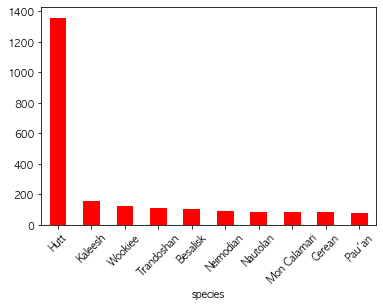

In [80]:
weight['mass'].sort_values(ascending=False).head(10).plot.bar(color='red')
plt.xticks(rotation=45) #이름 각도
plt.show()

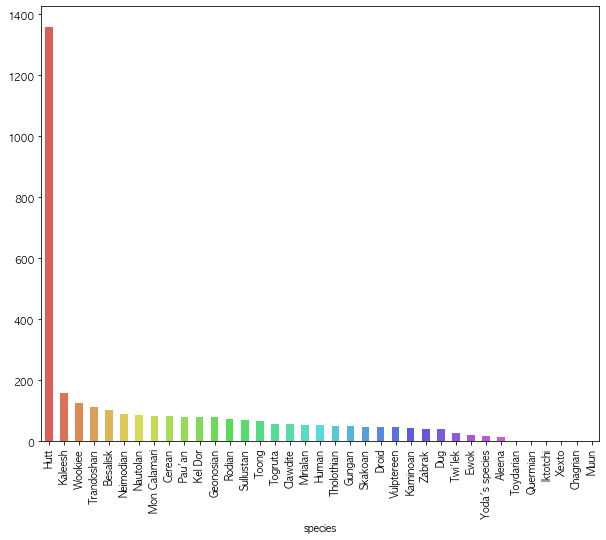

In [83]:
#스타워즈 종족별 몸무게 많은 순으로 그래프를 그려보자
f, ax = plt.subplots(1,1,figsize =(10,8))
colors = sns.color_palette('hls',len(weight['mass']))

g= weight['mass'].sort_values(ascending=False).plot.bar(color=colors)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

4-5. 스타워즈 캐릭터의 무게-키 상관관계

In [128]:
sw['mass'] = sw['mass'].astype(int)

In [129]:
sw['mass']

0      77
1      75
2      32
3     136
4      49
     ... 
82      0
83      0
84      0
85      0
86     45
Name: mass, Length: 87, dtype: int64

In [8]:
out2 = sw['mass'].isin([0])

In [9]:
sw[~out2]['mass']

0      77.0
1      75.0
2      32.0
3     136.0
4      49.0
      ...  
82      NaN
83      NaN
84      NaN
85      NaN
86     45.0
Name: mass, Length: 87, dtype: float64

In [15]:
#Hutt은 몸무게가 너무 outlier 하므로 out시키자!
#몸무게가 0인 것도 제외시키자!
out1 = sw['species'].isin(['Hutt'])
out2 = sw['mass'].isin([0])
sw[~out1][~out2].shape

(86, 11)

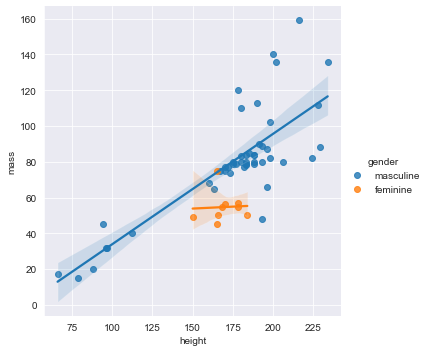

In [16]:
#두 데이터 사이의 상관관계를 나타내주는 lmplot
#replot은 점만 나타난다
sns.lmplot(data=sw[~out1][~out2], x='height', y='mass', hue='gender')
sns.set_style(style='darkgrid')
plt.show()

# 5.Review

스타워즈 데이터는:
총 데이터 개수: 957
총 결측치 수: 105 = 전체 데이터의 10.97%
스타워즈에 등장하는 등장인물 수: 87
스타워즈에 등장하는 종족 수: 37
스타워즈 캐릭터의 성별 비율은?
: 남성/남성 gender를 가진 캐릭터가 80% 가량을 차지한다.
성별에 따른 캐릭터 신장의 분포는?
: 남성 캐릭터의 키가 대체로 여성보다 크며, 로봇은 그보다 키가 작다.
가장 무거운 캐릭터와 가장 가벼운 캐릭터는?
: ['Ratts Tyerell']의 몸무게가 15.0 (으)로 가장 가볍다
['Jabba Desilijic Tiure']의 몸무게가 1358.0 (으)로 가장 가볍다
스타워즈 캐릭터의 키와 몸무게는 상관관계를 가질까?
: 그렇다. 인간과 다른 행성에 사는 종족이지만, 키와 몸무게는 대체로 비례 관계를 보인다.